In [1]:
#이 예제에서 simpleRNN / LSTM/ 1D-CNN 을 적용하여 분류문제를 수행하시오 
#각 방법에서 가능한 최적의 모델을 구축하고 비교분석하시오.
#또한 단어 사용 수와 임베딩 차원의 영향을 분석하시오

import matplotlib.pyplot as plt
import numpy

# 로이터 뉴스 데이터셋 불러오기
from tensorflow import keras
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, SimpleRNN, Dropout, Conv1D, GlobalMaxPooling1D
from keras.preprocessing import sequence
from keras import utils

# seed 값 설정
seed = 0
numpy.random.seed(seed)
#tensorflow.set_random_seed(3)

num_words = 1000
embed_dim = 200

# 불러온 데이터를 학습셋, 테스트셋으로 나누기
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=num_words, test_split=0.2)

# 데이터 확인하기
category = numpy.max(Y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

# 데이터 전처리
x_train = sequence.pad_sequences(X_train, maxlen=200)
x_test = sequence.pad_sequences(X_test, maxlen=200)
y_train = utils.to_categorical(Y_train)
y_test = utils.to_categorical(Y_test)
print(x_train.shape)

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
(8982, 200)


In [ ]:
# 모델의 설정 (model_1 = simpleRNN) 
model_1 = Sequential()
model_1.add(Embedding(num_words, embed_dim))
model_1.add(SimpleRNN(100, activation='tanh', dropout=0.3))
model_1.add(Dense(46, activation='softmax'))

model_1.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

model_1.summary()


checkpoint_cb_1 = keras.callbacks.ModelCheckpoint('best_model_1_rnn.keras',
                                                save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

history_1 = model_1.fit(x_train, y_train, batch_size=100, epochs=30,
                    validation_data=(x_test, y_test),
                    callbacks=[checkpoint_cb_1, early_stopping_cb])

# simpleRNN의 튜닝 1. units = 64
model_1_1 = Sequential()
model_1_1.add(Embedding(num_words, embed_dim))
model_1_1.add(SimpleRNN(64, activation='tanh', dropout=0.3))
model_1_1.add(Dense(46, activation='softmax'))

model_1_1.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

checkpoint_cb_1_1 = keras.callbacks.ModelCheckpoint('best_model_1_1_rnn.keras',
                                                save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

history_1_1 = model_1_1.fit(x_train, y_train, batch_size=100, epochs=30,
                    validation_data=(x_test, y_test),
                    callbacks=[checkpoint_cb_1_1, early_stopping_cb])

# simpleRNN의 튜닝2. units = 128
model_1_2 = Sequential()
model_1_2.add(Embedding(num_words, embed_dim))
model_1_2.add(SimpleRNN(128, activation='tanh', dropout=0.3))
model_1_2.add(Dense(46, activation='softmax'))

model_1_2.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

checkpoint_cb_1_2 = keras.callbacks.ModelCheckpoint('best_model_1_2_rnn.keras',
                                                save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

history_1_2 = model_1_2.fit(x_train, y_train, batch_size=100, epochs=30,
                    validation_data=(x_test, y_test),
                    callbacks=[checkpoint_cb_1_2, early_stopping_cb])

# simpleRNN의 튜닝3. units = 200
model_1_3 = Sequential()
model_1_3.add(Embedding(num_words, embed_dim))
model_1_3.add(SimpleRNN(200, activation='tanh', dropout=0.3))
model_1_3.add(Dense(46, activation='softmax'))

model_1_3.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

checkpoint_cb_1_3 = keras.callbacks.ModelCheckpoint('best_model_1_3_rnn.keras',
                                                save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

history_1_3 = model_1_3.fit(x_train, y_train, batch_size=100, epochs=30,
                    validation_data=(x_test, y_test),
                    callbacks=[checkpoint_cb_1_3, early_stopping_cb])



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 12s 108ms/step - accuracy: 0.3593 - loss: 2.4461 - val_accuracy: 0.4256 - val_loss: 2.2200
Epoch 2/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - accuracy: 0.4399 - loss: 2.1391 - val_accuracy: 0.4332 - val_loss: 2.1718
Epoch 3/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.4870 - loss: 1.9866 - val_accuracy: 0.4386 - val_loss: 2.1960
Epoch 4/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.5444 - loss: 1.7877 - val_accuracy: 0.5111 - val_loss: 1.9691
Epoch 5/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.5676 - loss: 1.6846 - val_accuracy: 0.4167 - val_loss: 2.2585
Epoch 6/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.5971 - loss: 1.5556 - val_accuracy: 0.4675 - val_loss: 1.9668
Epoch 7/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.6466 - loss: 1.3893 - val_accuracy: 0.4835 - val_loss: 1.9899
Epoch 8/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.6839 - loss: 1.2386 - val_accuracy: 0.4996 -

In [ ]:
# 모델의 설정 (model_2 = LSTM) 
model_2 = Sequential()
model_2.add(Embedding(num_words, embed_dim))
model_2.add(LSTM(100, activation='tanh', dropout=0.3))
model_2.add(Dense(46, activation='softmax'))

model_2.summary()

model_2.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

checkpoint_cb_2 = keras.callbacks.ModelCheckpoint('best_model_2_lstm.keras',
                                                save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

history_2 = model_2.fit(x_train, y_train, batch_size=100, epochs=30,
                    validation_data=(x_test, y_test),
                    callbacks=[checkpoint_cb_2, early_stopping_cb])


# LSTM 튜닝1. units = 64
model_2_1 = Sequential()
model_2_1.add(Embedding(num_words, embed_dim))
model_2_1.add(LSTM(64, activation='tanh', dropout=0.3))
model_2_1.add(Dense(46, activation='softmax'))

model_2_1.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

checkpoint_cb_2_1 = keras.callbacks.ModelCheckpoint('best_model_2_1_lstm.keras',
                                                save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

history_2_1 = model_2_1.fit(x_train, y_train, batch_size=100, epochs=30,
                    validation_data=(x_test, y_test),
                    callbacks=[checkpoint_cb_2_1, early_stopping_cb])

# LSTM 튜닝2. units = 128
model_2_2 = Sequential()
model_2_2.add(Embedding(num_words, embed_dim))
model_2_2.add(LSTM(128, activation='tanh', dropout=0.3))
model_2_2.add(Dense(46, activation='softmax'))

model_2_2.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

checkpoint_cb_2_2 = keras.callbacks.ModelCheckpoint('best_model_2_2_lstm.keras',
                                                save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

history_2_2 = model_2_2.fit(x_train, y_train, batch_size=100, epochs=30,
                    validation_data=(x_test, y_test),
                    callbacks=[checkpoint_cb_2_2, early_stopping_cb])

# LSTM 튜닝3. 레이어 적층 
model_2_3 = Sequential()
model_2_3.add(Embedding(num_words, embed_dim))
model_2_3.add(LSTM(100, activation='tanh', dropout=0.3, return_sequences=True)) 
model_2_3.add(LSTM(100, activation='tanh', dropout=0.3))
model_2_3.add(Dense(46, activation='softmax'))

model_2_3.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

checkpoint_cb_2_3 = keras.callbacks.ModelCheckpoint('best_model_2_3_lstm.keras',
                                                save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

history_2_3 = model_2_3.fit(x_train, y_train, batch_size=100, epochs=30,
                    validation_data=(x_test, y_test),
                    callbacks=[checkpoint_cb_2_3, early_stopping_cb])

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 36s 355ms/step - accuracy: 0.3876 - loss: 2.4735 - val_accuracy: 0.4871 - val_loss: 2.0514
Epoch 2/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 33s 369ms/step - accuracy: 0.5214 - loss: 1.9163 - val_accuracy: 0.5303 - val_loss: 1.9362
Epoch 3/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 62s 598ms/step - accuracy: 0.5463 - loss: 1.7949 - val_accuracy: 0.5463 - val_loss: 1.7722
Epoch 4/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 76s 535ms/step - accuracy: 0.5629 - loss: 1.6947 - val_accuracy: 0.5659 - val_loss: 1.7118
Epoch 5/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 72s 430ms/step - accuracy: 0.5940 - loss: 1.6285 - val_accuracy: 0.5980 - val_loss: 1.6790
Epoch 6/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 27s 296ms/step - accuracy: 0.6064 - loss: 1.5900 - val_accuracy: 0.6215 - val_loss: 1.5683
Epoch 7/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 26s 292ms/step - accuracy: 0.6338 - loss: 1.4631 - val_accuracy: 0.6242 - val_loss: 1.4917
Epoch 8/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 26s 286ms/step - accuracy: 0.6391 - loss: 1.4223 - val_accu

In [ ]:
# 모델의 설정 (model_3 = 1D_cnn) 
model_3 = Sequential()
model_3.add(Embedding(num_words, embed_dim))
model_3.add(Conv1D(32, 3, padding='valid', activation='relu'))
model_3.add(GlobalMaxPooling1D())
model_3.add(Dense(64, activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(46, activation='softmax'))

model_3.summary()

model_3.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

checkpoint_cb_3 = keras.callbacks.ModelCheckpoint('best_model_3_cnn.keras',
                                                save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

history_3 = model_3.fit(x_train, y_train, batch_size=100, epochs=30,
                    validation_data=(x_test, y_test),
                    callbacks=[checkpoint_cb_3, early_stopping_cb])

#1D CNN 튜닝 1. 필터 수 늘리기 32->64
model_3_1 = Sequential()
model_3_1.add(Embedding(num_words, embed_dim))
model_3_1.add(Conv1D(64, 3, padding='valid', activation='relu'))
model_3_1.add(GlobalMaxPooling1D())
model_3_1.add(Dense(64, activation='relu'))
model_3_1.add(Dropout(0.2))
model_3_1.add(Dense(46, activation='softmax'))

model_3_1.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

checkpoint_cb_3_1 = keras.callbacks.ModelCheckpoint('best_model_3_1_cnn.keras',
                                                save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

history_3_1 = model_3_1.fit(x_train, y_train, batch_size=100, epochs=30,
                    validation_data=(x_test, y_test),
                    callbacks=[checkpoint_cb_3_1, early_stopping_cb])

#1D CNN 튜닝 2. kernel_size (커널 크기) 변경 3 -> 5
model_3_2 = Sequential()
model_3_2.add(Embedding(num_words, embed_dim))
model_3_2.add(Conv1D(32, 5, padding='valid', activation='relu'))
model_3_2.add(GlobalMaxPooling1D())
model_3_2.add(Dense(64, activation='relu'))
model_3_2.add(Dropout(0.2))
model_3_2.add(Dense(46, activation='softmax'))

model_3_2.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

checkpoint_cb_3_2 = keras.callbacks.ModelCheckpoint('best_model_3_2_cnn.keras',
                                                save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

history_3_2 = model_3_2.fit(x_train, y_train, batch_size=100, epochs=30,
                    validation_data=(x_test, y_test),
                    callbacks=[checkpoint_cb_3_2, early_stopping_cb])


#1D CNN 튜닝 3. 활성화 함수 변경 relu -> tanh
model_3_3 = Sequential()
model_3_3.add(Embedding(num_words, embed_dim))
model_3_3.add(Conv1D(32, 3, padding='valid', activation='tanh'))
model_3_3.add(GlobalMaxPooling1D())
model_3_3.add(Dense(64, activation='tanh'))
model_3_3.add(Dropout(0.2))
model_3_3.add(Dense(46, activation='softmax'))

model_3_3.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

checkpoint_cb_3_3 = keras.callbacks.ModelCheckpoint('best_model_3_3_cnn.keras',
                                                save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

history_3_3 = model_3_3.fit(x_train, y_train, batch_size=100, epochs=30,
                    validation_data=(x_test, y_test),
                    callbacks=[checkpoint_cb_3_3, early_stopping_cb])


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.4282 - loss: 2.4586 - val_accuracy: 0.5178 - val_loss: 1.9259
Epoch 2/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.5626 - loss: 1.7941 - val_accuracy: 0.6336 - val_loss: 1.6010
Epoch 3/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.6476 - loss: 1.5288 - val_accuracy: 0.6683 - val_loss: 1.3991
Epoch 4/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6827 - loss: 1.3471 - val_accuracy: 0.6852 - val_loss: 1.2810
Epoch 5/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7084 - loss: 1.2210 - val_accuracy: 0.7066 - val_loss: 1.1925
Epoch 1/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.4143 - loss: 2.4779 - val_accuracy: 0.5058 - val_loss: 1.8867
Epoch 2/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.5910 - loss: 1.7022 - val_accuracy: 0.6598 - val_loss: 1.4658
Epoch 3/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.6799 - loss: 1.3791 - val_accuracy: 0.6968 - v

In [5]:
# 테스트 정확도 출력
print("\n Test Accuracy_model_1: %.4f" % (model_1.evaluate(x_test, y_test)[1]))
print("\n Test Accuracy_model_1_1: %.4f" % (model_1_1.evaluate(x_test, y_test)[1]))
print("\n Test Accuracy_model_1_2: %.4f" % (model_1_2.evaluate(x_test, y_test)[1]))
print("\n Test Accuracy_model_1_3: %.4f" % (model_1_3.evaluate(x_test, y_test)[1]))
print("\n Test Accuracy_model_2: %.4f" % (model_2.evaluate(x_test, y_test)[1]))
print("\n Test Accuracy_model_2_1: %.4f" % (model_2_1.evaluate(x_test, y_test)[1]))
print("\n Test Accuracy_model_2_2: %.4f" % (model_2_2.evaluate(x_test, y_test)[1]))
print("\n Test Accuracy_model_2_3: %.4f" % (model_2_3.evaluate(x_test, y_test)[1]))

# 테스트 셋의 오차
y_vloss_1 = history_1.history['val_loss']
y_vloss_1_1 = history_1_1.history['val_loss']
y_vloss_1_2 = history_1_2.history['val_loss']
y_vloss_1_3 = history_1_3.history['val_loss']
y_vloss_2 = history_2.history['val_loss']
y_vloss_2_1 = history_2_1.history['val_loss']
y_vloss_2_2 = history_2_2.history['val_loss']
y_vloss_2_3 = history_2_3.history['val_loss']

# 학습셋의 오차
y_loss_1 = history_1.history['loss']
y_loss_1_1 = history_1_1.history['loss']
y_loss_1_2 = history_1_2.history['loss']
y_loss_1_3 = history_1_3.history['loss']
y_loss_2 = history_2.history['loss']
y_loss_2_1 = history_2_1.history['loss']
y_loss_2_2 = history_2_2.history['loss']
y_loss_2_3 = history_2_3.history['loss']

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4996 - loss: 1.9405

 Test Accuracy_model_1: 0.4996
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5886 - loss: 1.6995

 Test Accuracy_model_1_1: 0.5886
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.3976 - loss: 2.3287

 Test Accuracy_model_1_2: 0.3976
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.4265 - loss: 2.2133

 Test Accuracy_model_1_3: 0.4265
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7627 - loss: 0.9917

 Test Accuracy_model_2: 0.7627
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.4662 - loss: 2.2088

 Test Accuracy_model_2_1: 0.4662
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.4541 - loss: 2.0151

 Test Accuracy_model_2_2: 0.4541
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.4996 - loss: 2.0460

 Test Accuracy_model_2_3: 0.4996


In [6]:
#테스트 정확도 출력
print("\n Test Accuracy_model_3: %.4f" % (model_3.evaluate(x_test, y_test)[1]))
print("\n Test Accuracy_model_3_1: %.4f" % (model_3_1.evaluate(x_test, y_test)[1]))
print("\n Test Accuracy_model_3_2: %.4f" % (model_3_2.evaluate(x_test, y_test)[1]))
print("\n Test Accuracy_model_3_3: %.4f" % (model_3_3.evaluate(x_test, y_test)[1]))

#테스트셋의 오차
y_vloss_3 = history_3.history['val_loss']
y_vloss_3_1 = history_3_1.history['val_loss']
y_vloss_3_2 = history_3_2.history['val_loss']
y_vloss_3_3 = history_3_3.history['val_loss']

#학습셋의 오차 
y_loss_3 = history_3.history['loss']
y_loss_3_1 = history_3_1.history['loss']
y_loss_3_2 = history_3_2.history['loss']
y_loss_3_3 = history_3_3.history['loss']

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5178 - loss: 1.9259

 Test Accuracy_model_3: 0.5178
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5058 - loss: 1.8867

 Test Accuracy_model_3_1: 0.5058
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5125 - loss: 1.9720

 Test Accuracy_model_3_2: 0.5125
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5232 - loss: 1.9181

 Test Accuracy_model_3_3: 0.5232


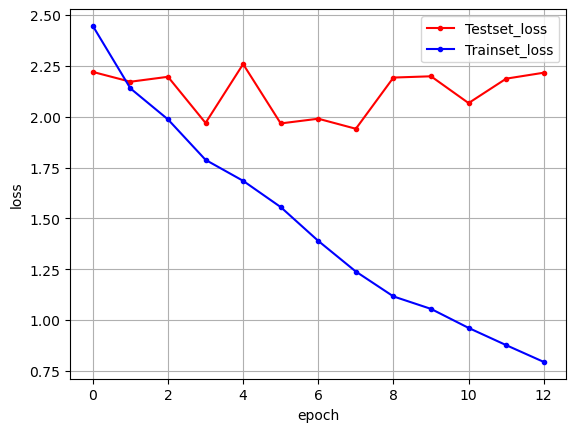

In [7]:
# 그래프로 표현
x_len = numpy.arange(len(y_loss_1))
plt.plot(x_len, y_vloss_1, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss_1, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


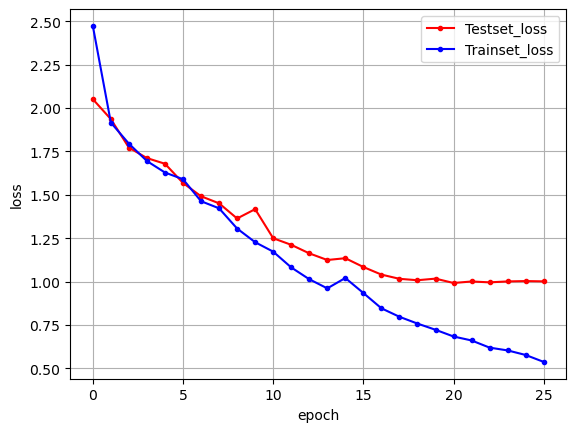

In [8]:
# 그래프로 표현
x_len = numpy.arange(len(y_loss_2))
plt.plot(x_len, y_vloss_2, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss_2, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


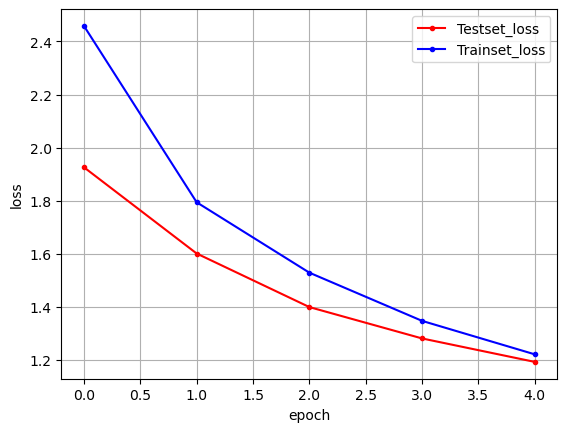

In [9]:
# 그래프로 표현
x_len = numpy.arange(len(y_loss_3))
plt.plot(x_len, y_vloss_3, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss_3, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


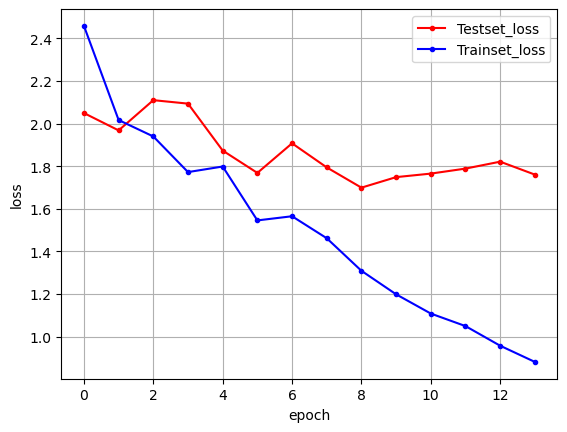

In [10]:
# 그래프로 표현
x_len = numpy.arange(len(y_loss_1_1))
plt.plot(x_len, y_vloss_1_1, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss_1_1, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


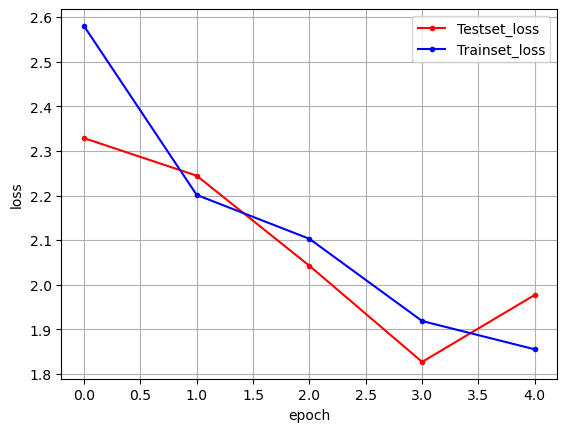

In [11]:
# 그래프로 표현
x_len = numpy.arange(len(y_loss_1_2))
plt.plot(x_len, y_vloss_1_2, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss_1_2, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


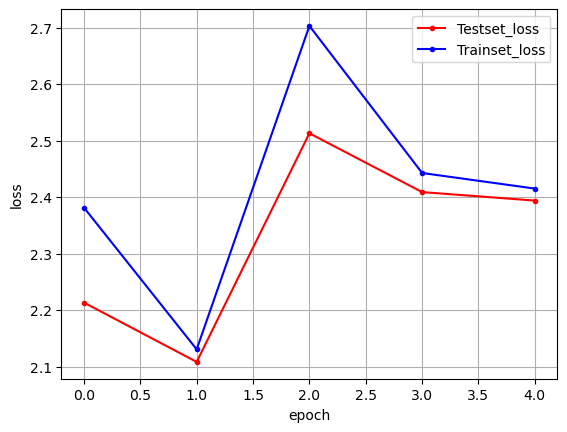

In [12]:
# 그래프로 표현
x_len = numpy.arange(len(y_loss_1_3))
plt.plot(x_len, y_vloss_1_3, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss_1_3, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


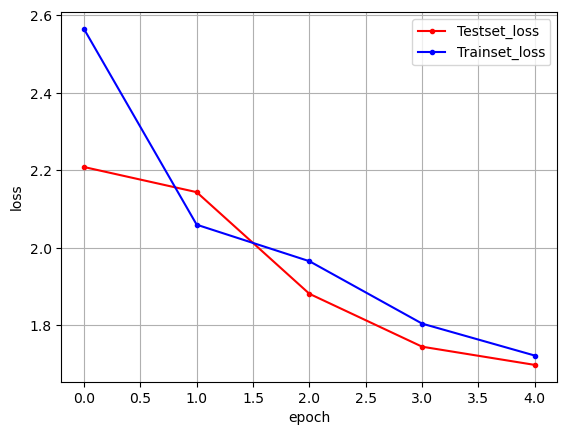

In [13]:
# 그래프로 표현
x_len = numpy.arange(len(y_loss_2_1))
plt.plot(x_len, y_vloss_2_1, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss_2_1, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


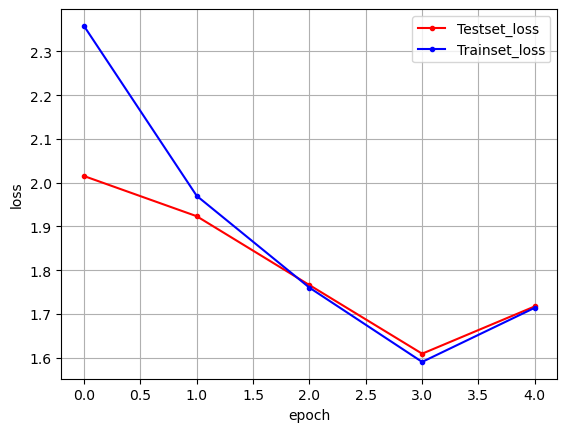

In [14]:
# 그래프로 표현
x_len = numpy.arange(len(y_loss_2_2))
plt.plot(x_len, y_vloss_2_2, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss_2_2, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


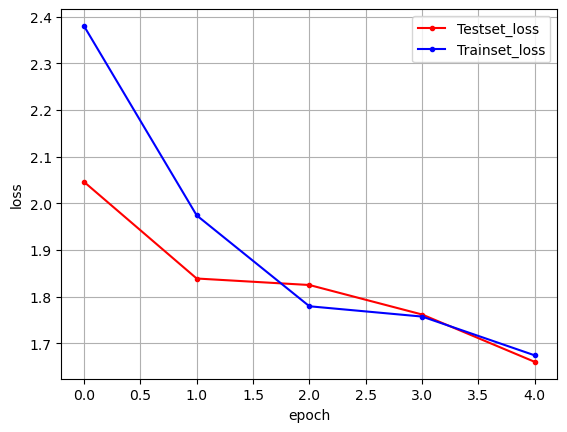

In [15]:
# 그래프로 표현
x_len = numpy.arange(len(y_loss_2_3))
plt.plot(x_len, y_vloss_2_3, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss_2_3, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


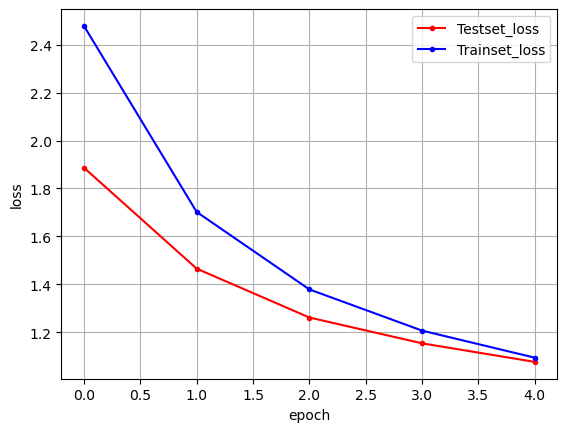

In [16]:
# 그래프로 표현
x_len = numpy.arange(len(y_loss_3_1))
plt.plot(x_len, y_vloss_3_1, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss_3_1, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


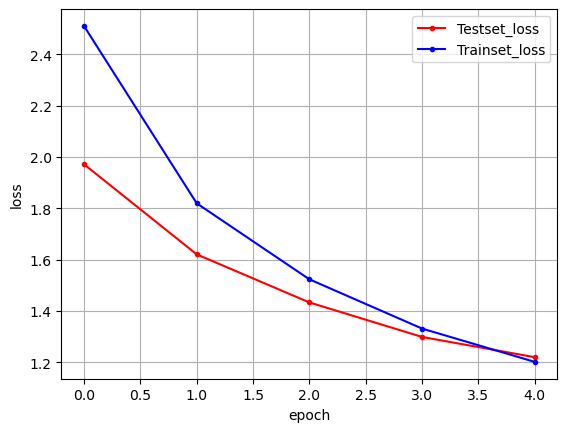

In [17]:
# 그래프로 표현
x_len = numpy.arange(len(y_loss_3_2))
plt.plot(x_len, y_vloss_3_2, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss_3_2, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


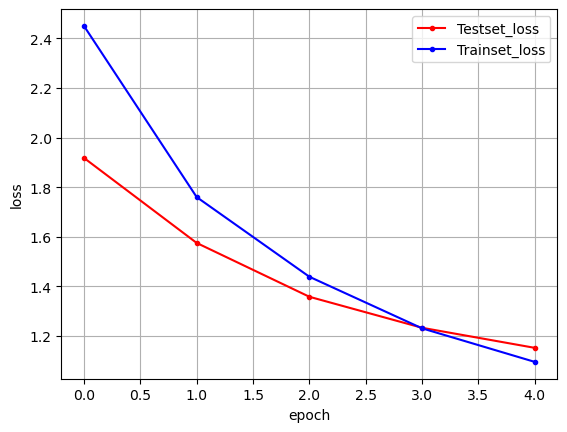

In [18]:
# 그래프로 표현
x_len = numpy.arange(len(y_loss_3_3))
plt.plot(x_len, y_vloss_3_3, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss_3_3, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
